In [33]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
import numpy as np

#визуализация
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#доп настройки
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')  

In [34]:
#чтение датасета с помощью библиотеки pandas
df = pd.read_csv('5gym_churn.csv')
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [35]:
#приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
print('Кол-во дублей в строках: {}\n'.format(df.duplicated().sum()))
print(df.info())
df.head(5)

Кол-во дублей в строках: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total   

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [36]:
print('Описание признаков и целевой перменной:')
df.describe().T

Описание признаков и целевой перменной:


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [37]:
print('Отток:')
print(df[df['churn']==1].describe().T)
print('\nОставшиеся клиенты:')
print(df[df['churn']==0].describe().T)

Отток:
                                    count        mean        std        min        25%         50%         75%         max
gender                             1061.0    0.510839   0.500118   0.000000   0.000000    1.000000    1.000000    1.000000
near_location                      1061.0    0.768143   0.422217   0.000000   1.000000    1.000000    1.000000    1.000000
partner                            1061.0    0.355325   0.478837   0.000000   0.000000    0.000000    1.000000    1.000000
promo_friends                      1061.0    0.183789   0.387495   0.000000   0.000000    0.000000    0.000000    1.000000
phone                              1061.0    0.902922   0.296204   0.000000   1.000000    1.000000    1.000000    1.000000
contract_period                    1061.0    1.728558   2.132371   1.000000   1.000000    1.000000    1.000000   12.000000
group_visits                       1061.0    0.268615   0.443448   0.000000   0.000000    0.000000    1.000000    1.000000
age      

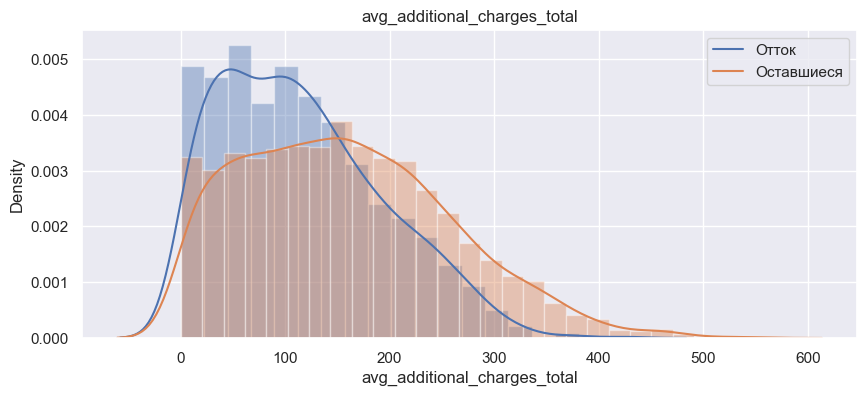

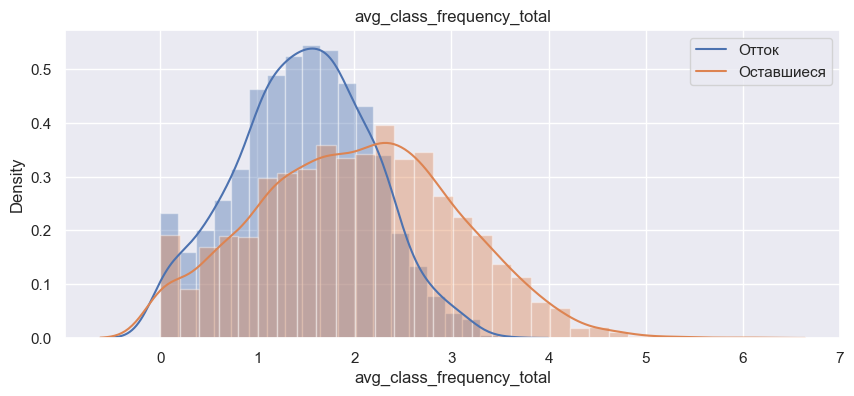

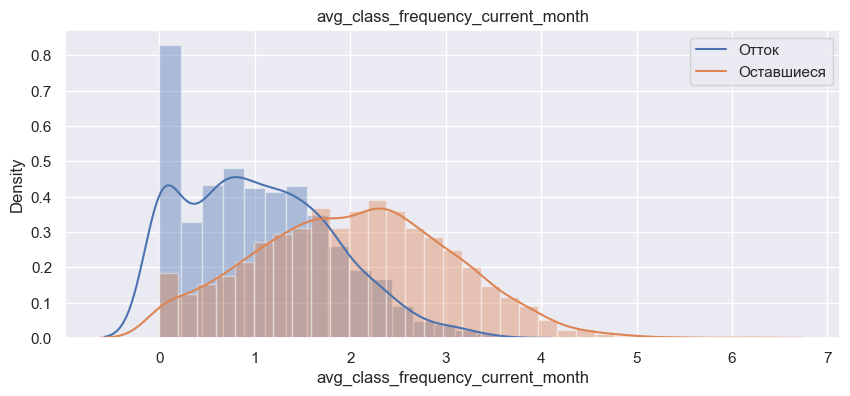

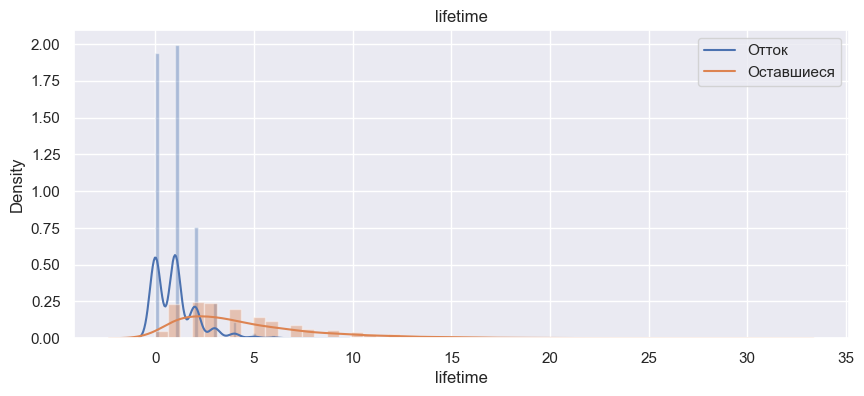

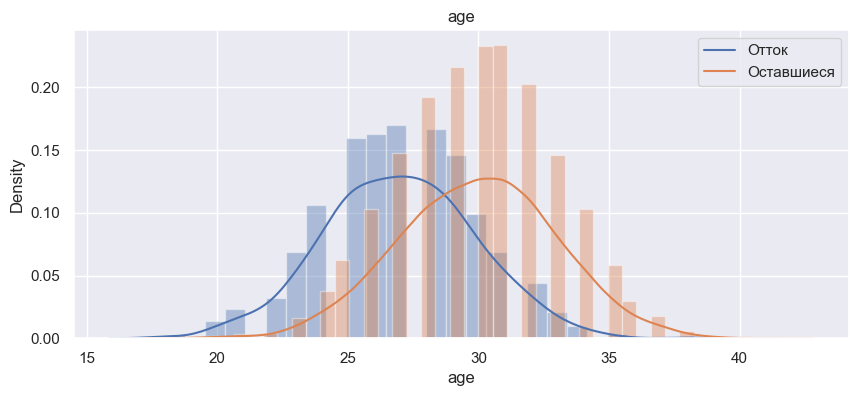

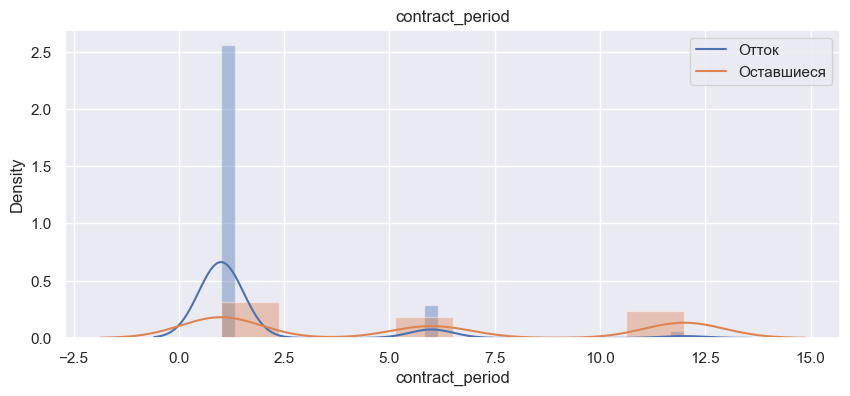

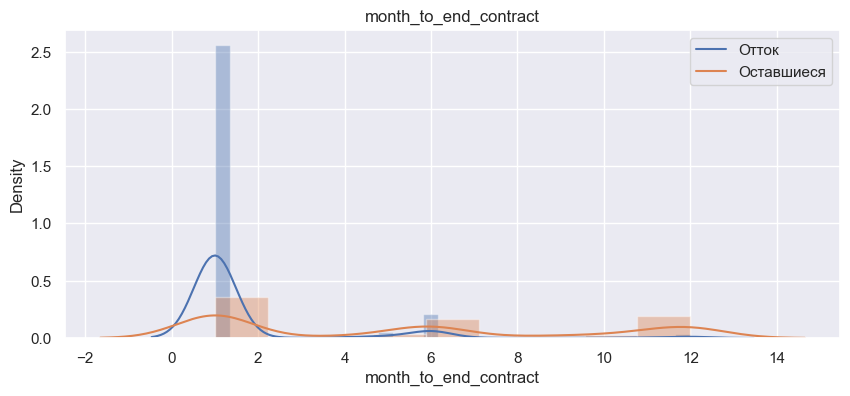

In [38]:
left = df[df['churn']==1]
stayed = df[df['churn']==0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in distplot_columns: 
  plt.figure(figsize=(10,4)) 
  plt.title(column)
  sns.distplot(left[column])
  sns.distplot(stayed[column])
  plt.legend(['Отток', 'Оставшиеся'])
  plt.show()

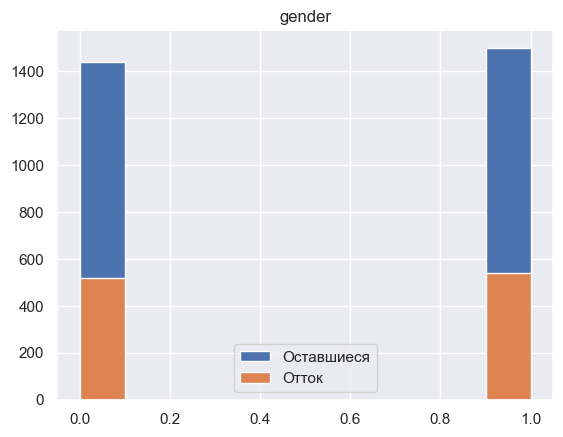

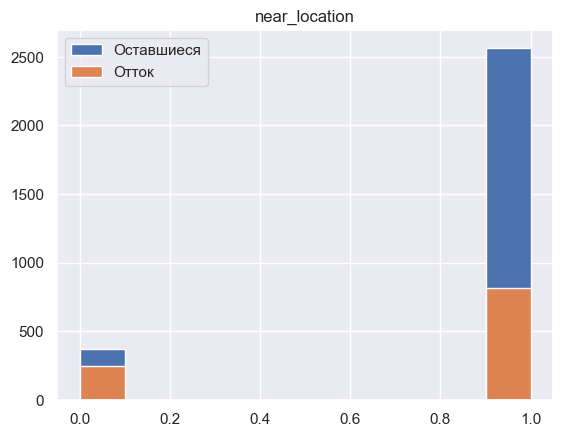

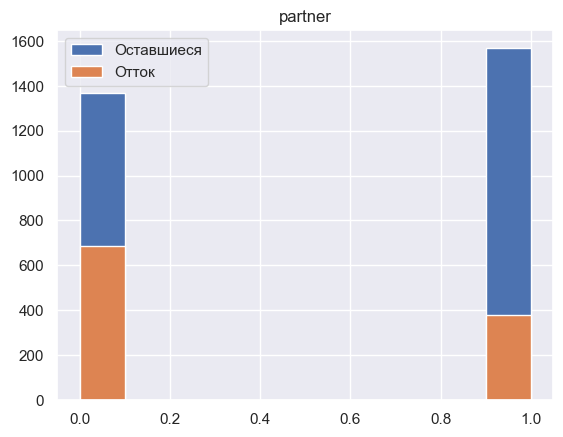

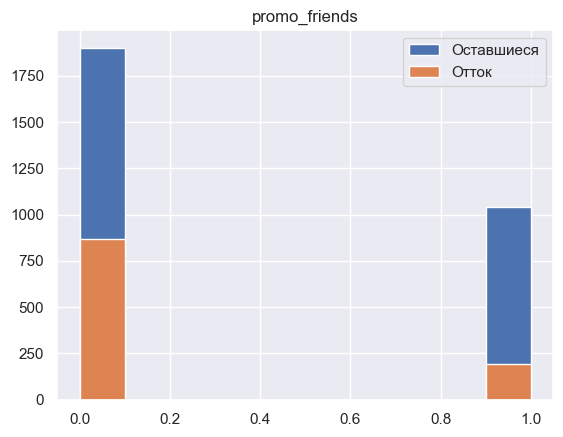

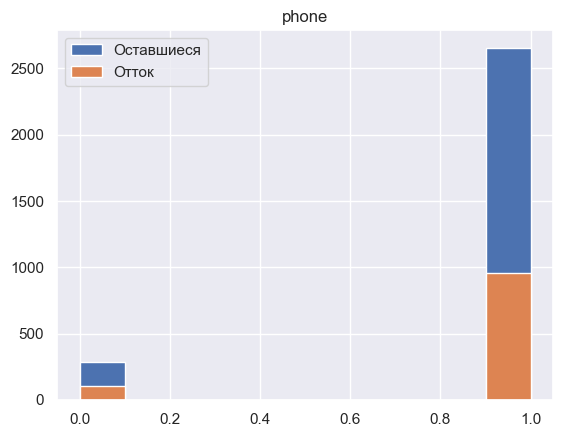

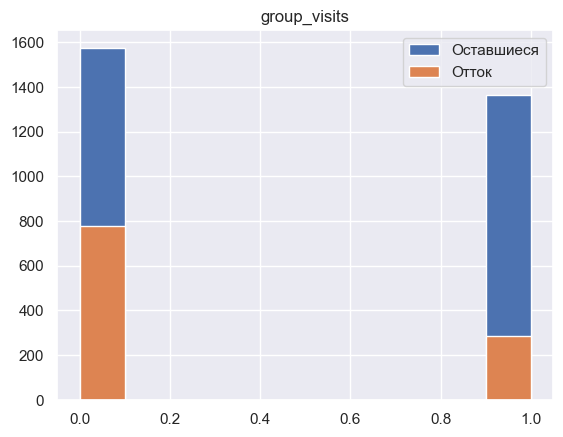

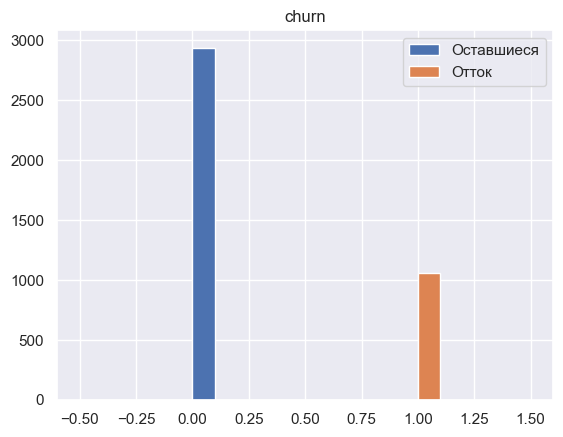

In [39]:
for column in df.columns:
  if column not in distplot_columns:
    df.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

In [40]:
X = df.drop(['churn'], axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
print('Метрики для модели логистической регрессии:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print('\nМетрики для модели случайного леса:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))

features = pd.DataFrame(lr_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)
print('\nКоэффициенты признаков в оптимальной функции логистической регрессии:')
print(features)

Метрики для модели логистической регрессии:
accuracy_score: 0.9225
precision_score: 0.8541666666666666
recall_score:0.8282828282828283

Метрики для модели случайного леса:
accuracy_score: 0.915
precision_score: 0.8385416666666666
recall_score:0.8131313131313131

Коэффициенты признаков в оптимальной функции логистической регрессии:
                              feature      coef
12  avg_class_frequency_current_month  4.454231
10                           lifetime  3.846281
11          avg_class_frequency_total  3.299788
7                                 age  1.091431
5                     contract_period  0.719095
8        avg_additional_charges_total  0.552164
9               month_to_end_contract  0.534026
6                        group_visits  0.393453
3                       promo_friends  0.275671
2                             partner  0.081512
1                       near_location  0.075644
0                              gender  0.013079
4                               phone  0.00

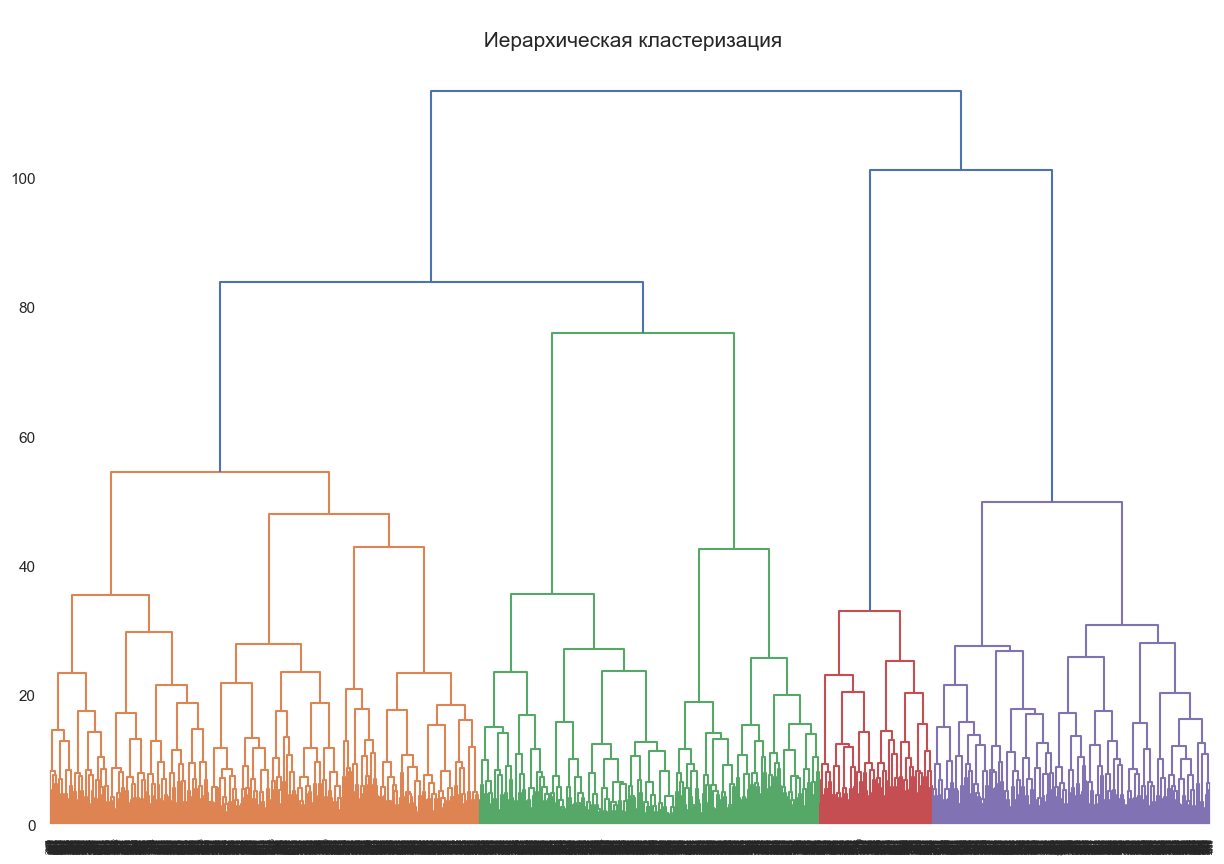

In [65]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
df['cluster_km'] = labels

In [42]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


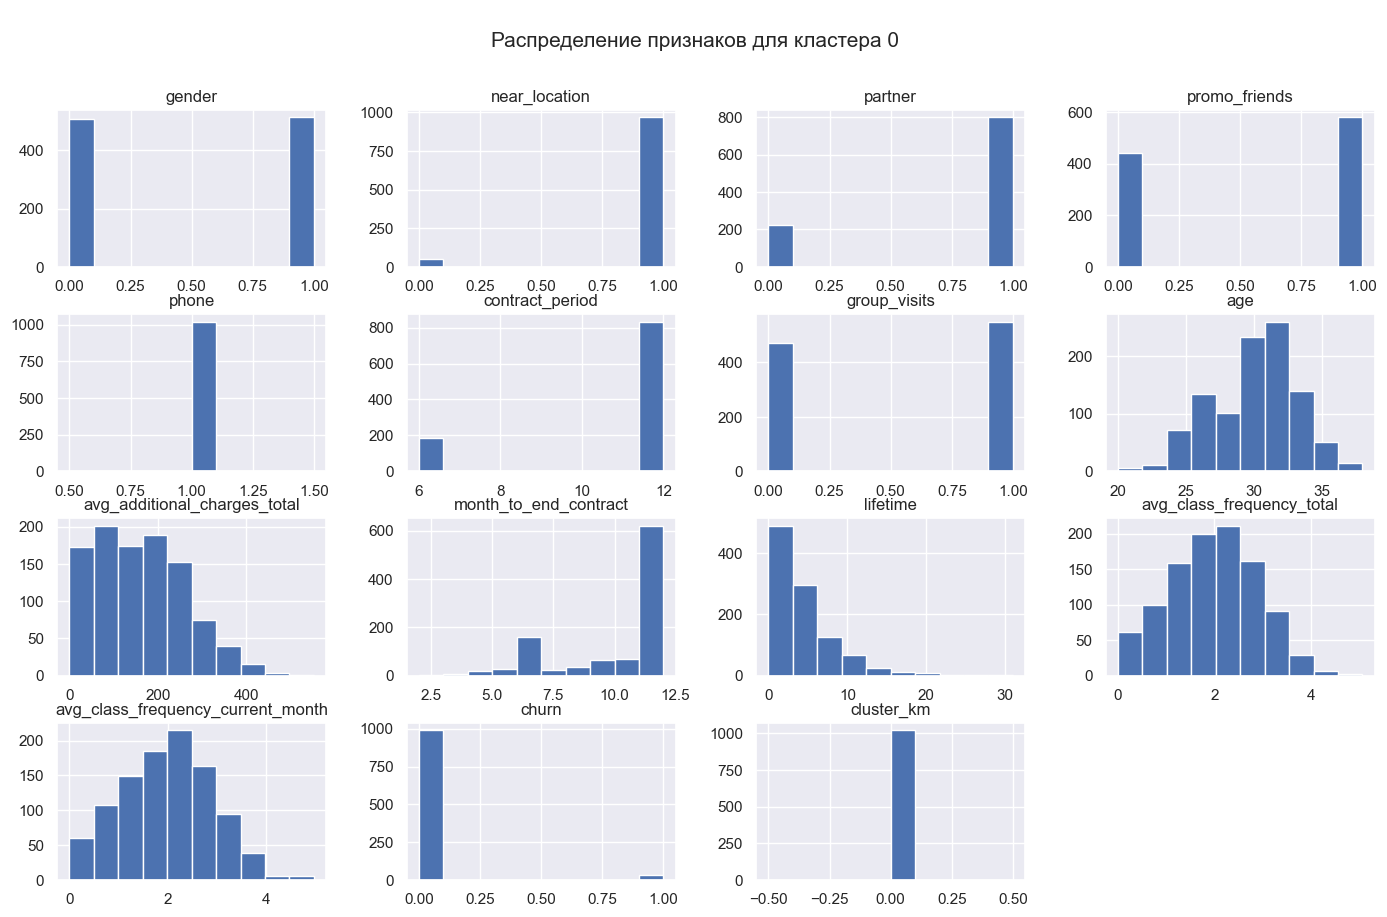

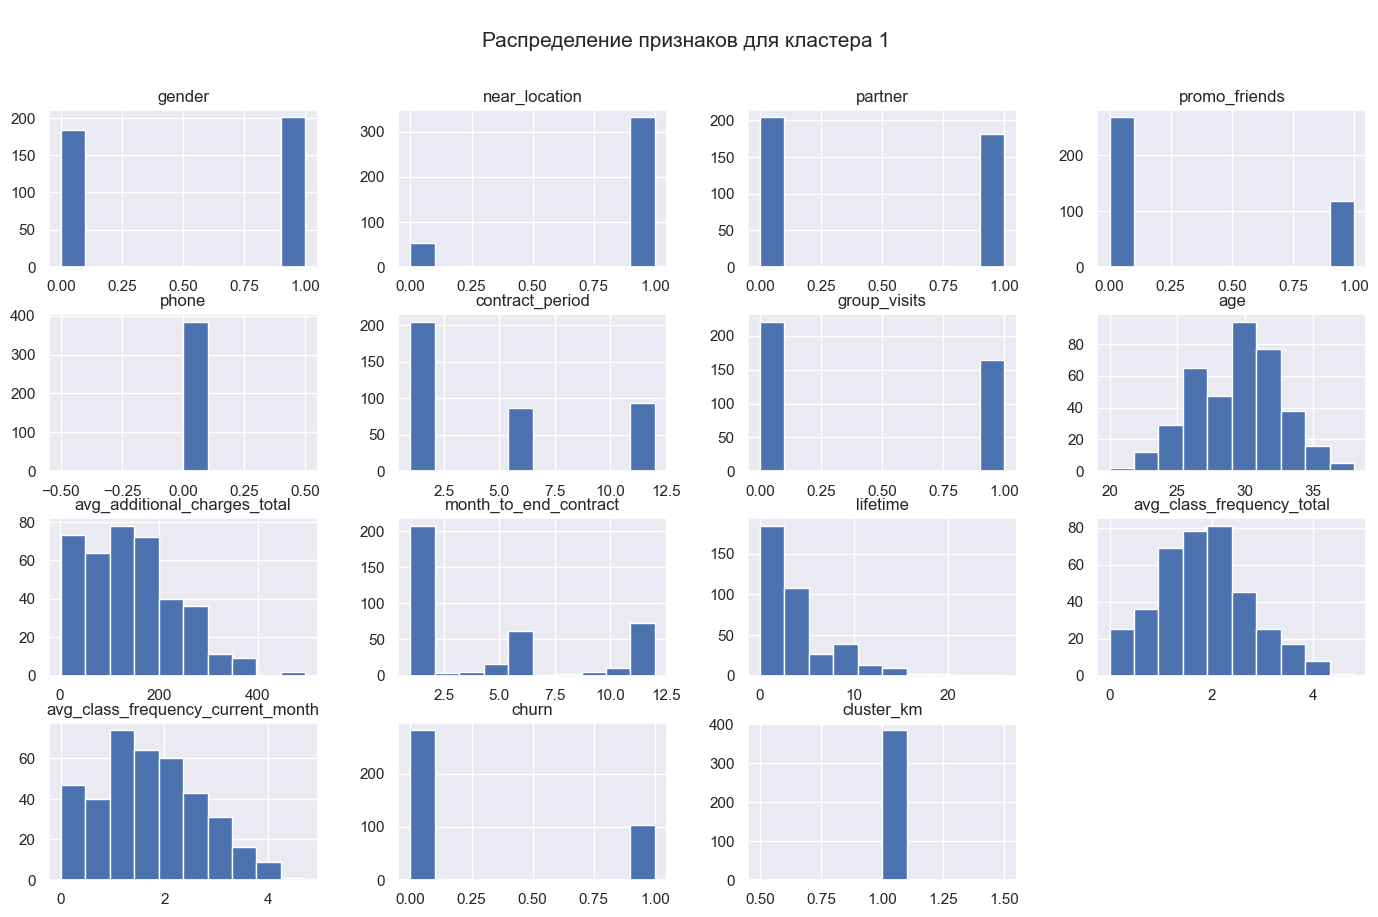

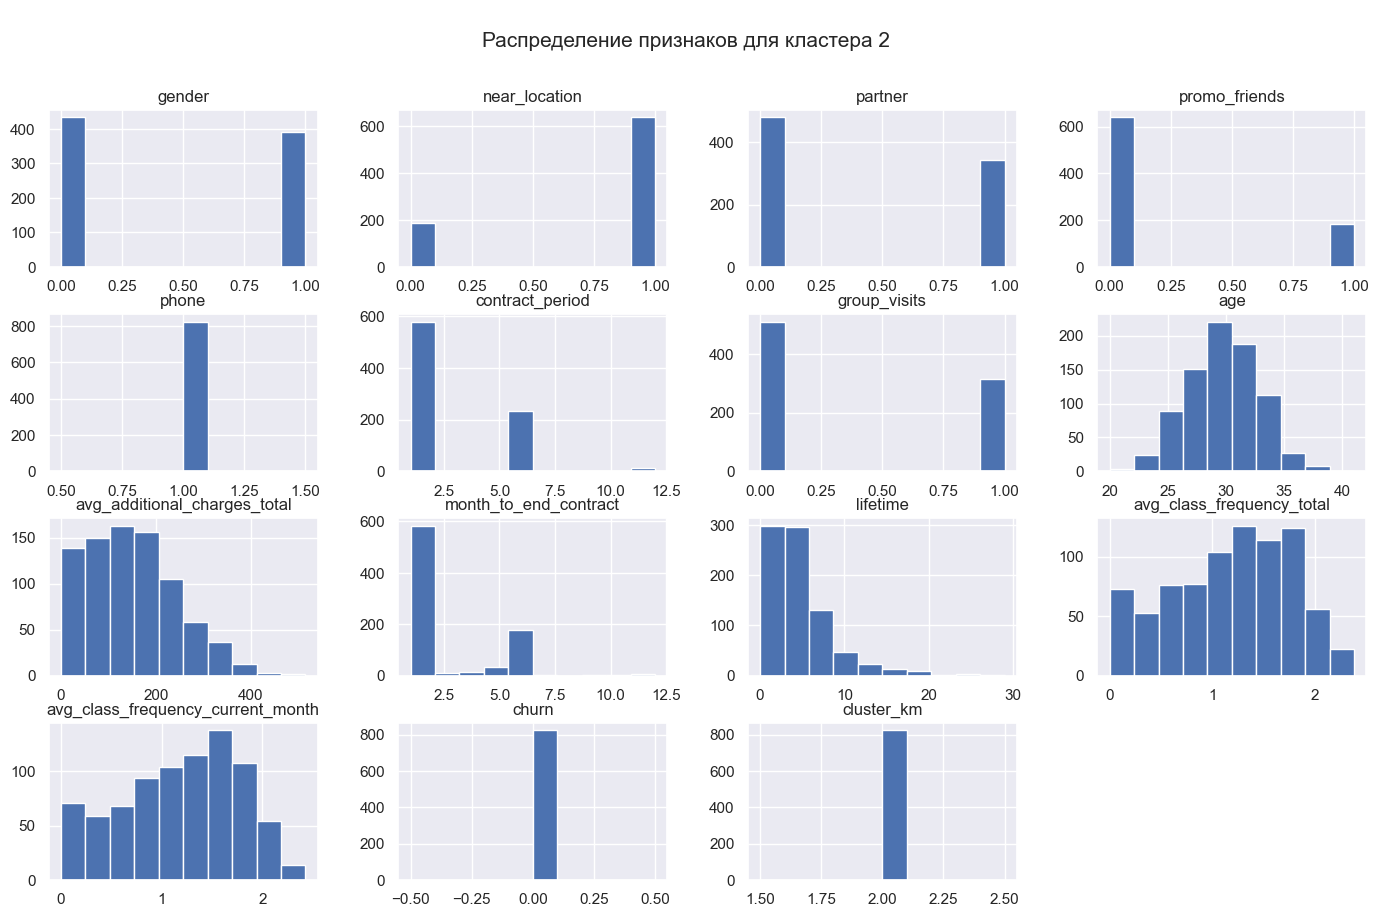

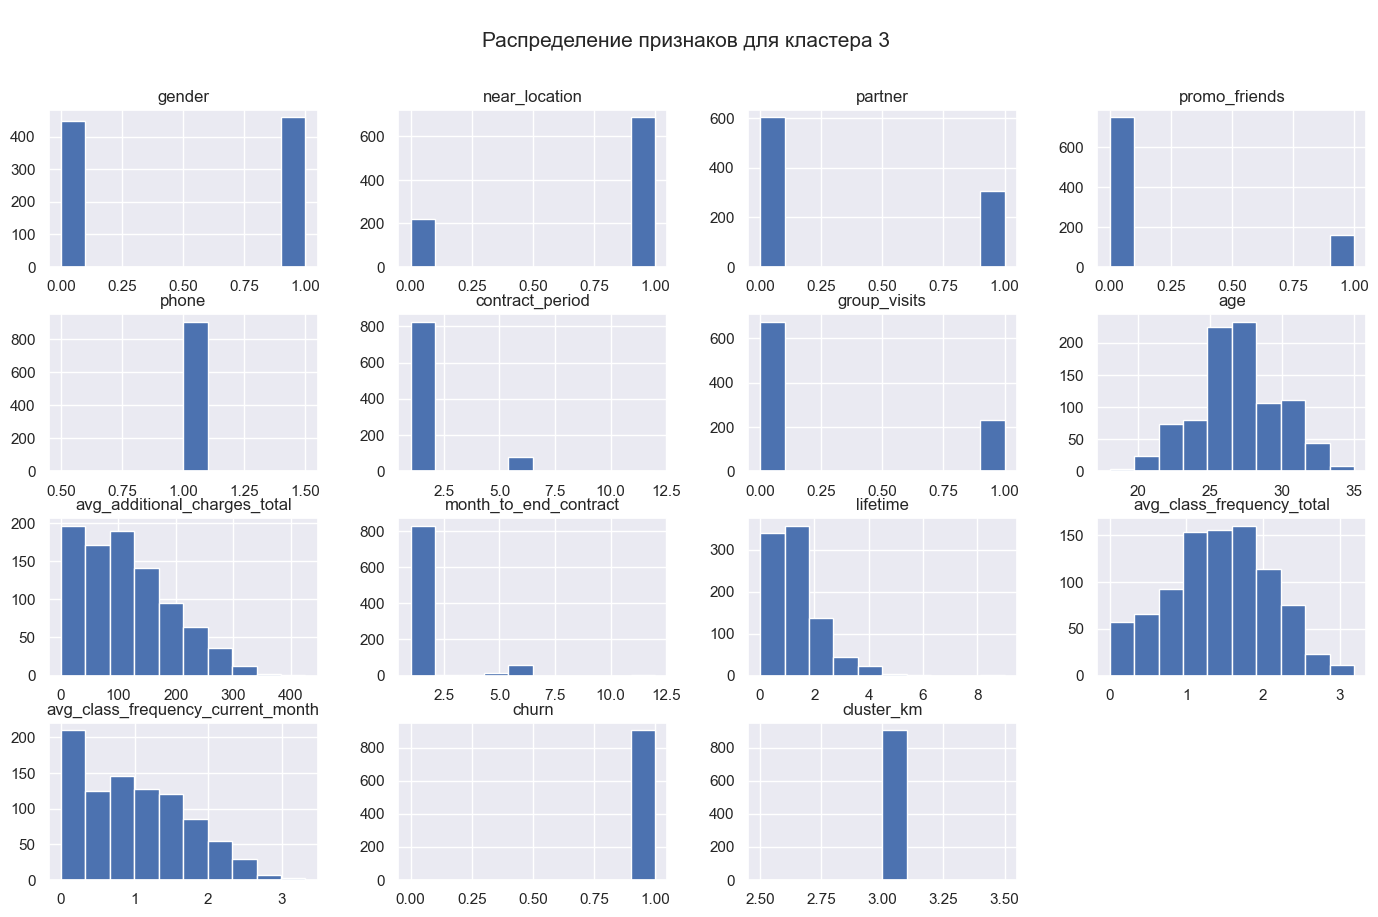

In [66]:
for value in [0, 1, 2, 3]:
  df[df['cluster_km']==value].hist(figsize=(17,10))
  plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
  plt.show()

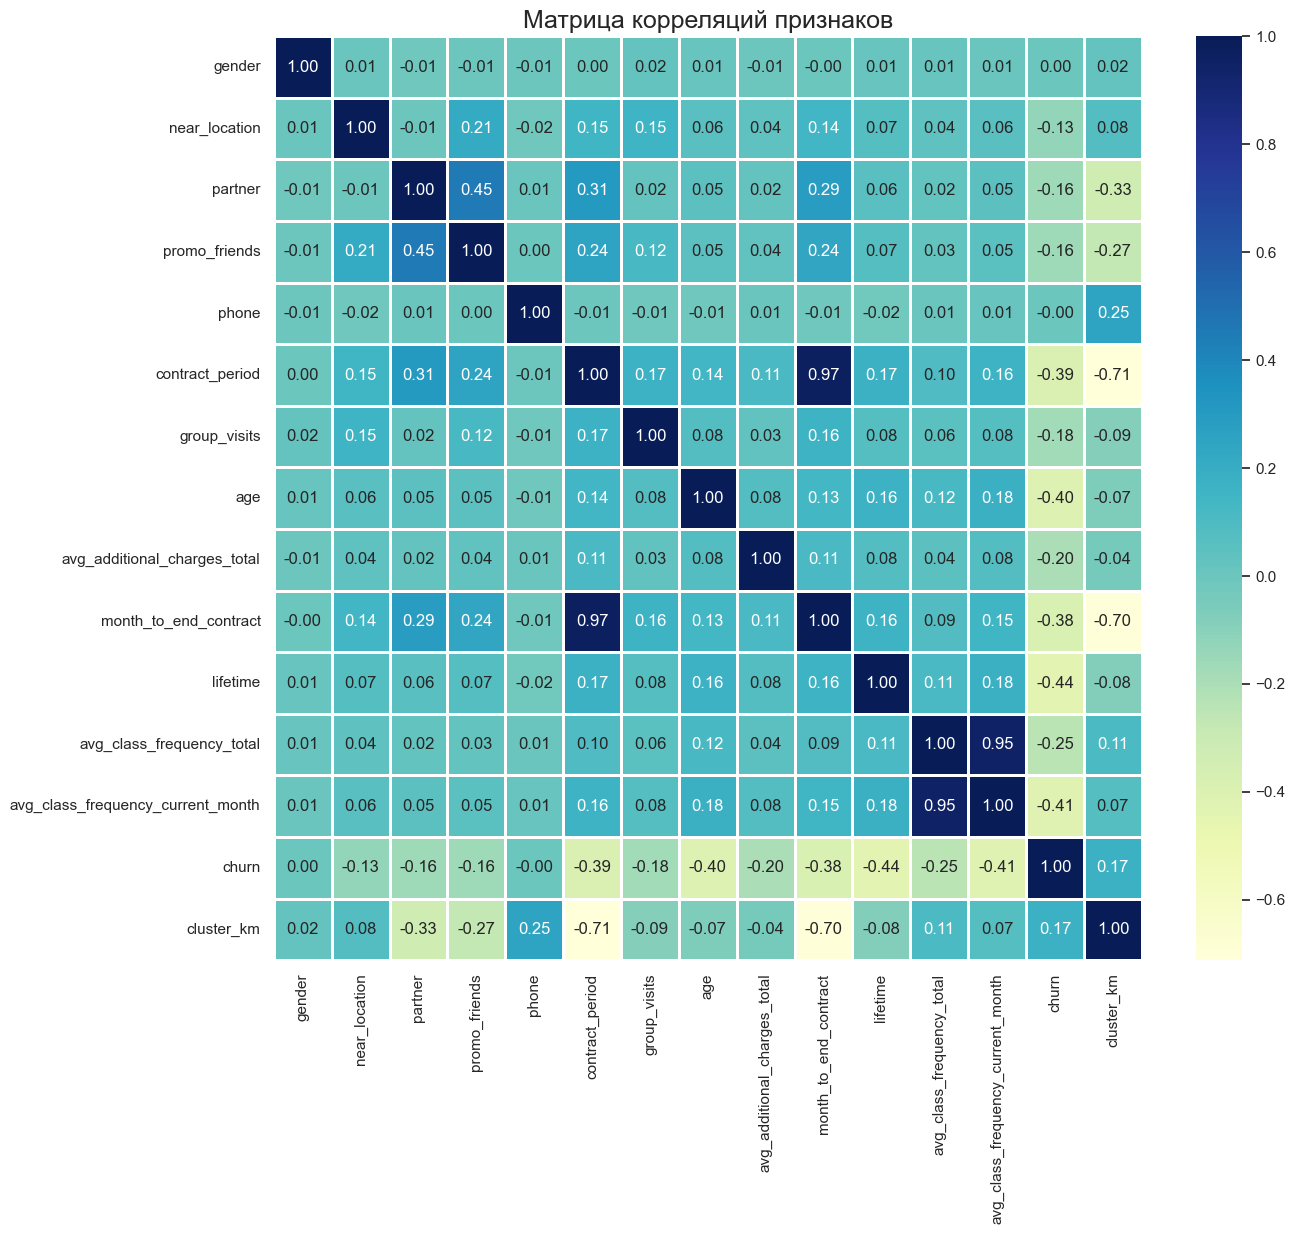

In [ ]:
# Построение матрицы корреляции признаков в датасете
cm = df.corr()

# Рисую график количества записей для каждого события
plt.figure(figsize=(14, 12)) # Размер графика
plt.title('Матрица корреляций признаков', fontsize=18) # Название графика
sns.heatmap(cm, annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap="YlGnBu") # График "тепловая карта"
plt.show()

In [59]:
 
# Импортирую класс алгоритма KMeans
from sklearn.cluster import KMeans

scaler = StandardScaler() # Создаю объект класса Scaler (нормализатор)

# Обучаю нормализатор и преобразую набор данных
standart_df = scaler.fit_transform(df)

# Инициализирую модель K_Means с числом кластеров равным 5
km = KMeans(n_clusters = 5, random_state=1)

# Применяю модель K_Means к стандартизированным данным и кластеризирую их
cluster_df = km.fit_predict(standart_df)


# Присваиваю каждому наблюдению в датафрейме соответствующее значение кластера 
df['cluster_km'] = cluster_df

# Подсчитываю среднее значение каждого признака для каждого кластера
display(df.groupby('cluster_km').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.507987,0.760383,0.341853,0.179979,0.998935,1.572950,0.259851,26.922258,115.210131,1.519702,0.978701,1.452290,1.029279,0.998935
1,0.474576,0.774818,0.416465,0.223971,1.000000,2.582324,0.382567,29.779661,150.117911,2.428571,4.490315,1.180169,1.179629,0.000000
2,0.550296,0.876923,0.370414,0.224852,0.998817,2.685207,0.448521,30.074556,163.165960,2.476923,4.707692,2.919525,2.927052,0.007101
3,0.502982,0.948310,0.783300,0.568588,1.000000,10.938370,0.542744,30.008946,161.526568,9.983101,4.753479,1.987456,1.981292,0.014911
4,0.523438,0.864583,0.471354,0.307292,0.000000,4.796875,0.427083,29.315104,143.813122,4.484375,3.934896,1.852030,1.720839,0.265625


In [57]:
# Группирую таблицу по признаку 'Churn' и подсчитываю среднее значение по всем столбцам
df.groupby('churn').mean().reset_index()
# Имортирую необходимую модель для обучения
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Создаю класс модели LogisticRegression
log_model = LogisticRegression(random_state=0, solver = 'lbfgs')

# Разделяю выборку на признаки [матрица Х] и целевую переменную [Y]
X = df.drop('churn', axis = 1)
y = df['churn']

# Разделяю данные на обучающую 80% [train] и валидационную 20% [test] выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=0)

# Обучаю модель логистической регрессии
log_model.fit(X_train, y_train)

# Использую обученную модель для получения прогноза на валидационной выборке
log_predictions = log_model.predict(X_test)

print('Модель:', 'Логистическая регрессия успешно обучена!')

Модель: Логистическая регрессия успешно обучена!


In [58]:
# Импортирую необходимую модель для обучения
from sklearn.ensemble import RandomForestClassifier

# Создаю класс модели RandomForestRegressor со следующими значениями
# Кол-во деревьев = 150, Параметр bootstrap = True, Глубина дерева = 12, максимум признаков для дерева = 12
rf_model = RandomForestClassifier(n_estimators = 150, bootstrap = True, max_depth=12, max_features=12, random_state=0)

# Обучаю модель алгоритмом Случайный Лес - Random Forest
rf_model.fit(X_train, y_train)

# Использую обученную модель для получения прогноза на валидационной выборке
forest_predictions = rf_model.predict(X_test)
print('Модель:', 'Случайный лес успешно обучена!')

Модель: Случайный лес успешно обучена!


In [60]:
# Импортирую необходимые классы метрик для сравнения качества двух моделей
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Расчёт метрик для модели  Logistic Regression
accuracy_log = accuracy_score(y_test, log_predictions)   # Расчёт метрики Accuracy
precision_log = precision_score(y_test, log_predictions) # Расчёт метрики Precision  
recall_log = recall_score(y_test, log_predictions)       # Расчёт метрики Recall

# Расчёт метрик для модели  Random Forest Regressor
accuracy_forest = accuracy_score(y_test, forest_predictions)   # Расчёт метрики Accuracy
precision_forest = precision_score(y_test, forest_predictions) # Расчёт метрики Precision  
recall_forest = recall_score(y_test, forest_predictions)       # Расчёт метрики Recall

# Вывод результатов расчитанных метрик на экран
print('Модель',  'Логистическая регрессия - Logistic Regression')
print('Метрика Accuracy:', '{:.2f}%'.format(accuracy_log))
print('Метрика Precision:', '{:.2f}%'.format(precision_log))
print('Метрика Recall:', '{:.2f}%'.format(recall_log))
print( '====================================================')
print('Модель',  'Случайный лес - Random Forest Classifier')
print('Метрика Accuracy:', '{:.2f}%'.format(accuracy_forest))
print('Метрика Precision:', '{:.2f}%'.format(precision_forest))
print('Метрика Recall:', '{:.2f}%'.format(recall_forest))

Модель Логистическая регрессия - Logistic Regression
Метрика Accuracy: 0.99%
Метрика Precision: 1.00%
Метрика Recall: 0.96%
Модель Случайный лес - Random Forest Classifier
Метрика Accuracy: 0.98%
Метрика Precision: 0.98%
Метрика Recall: 0.95%


In [63]:
# Импортирую класс алгоритма KMeans
from sklearn.cluster import KMeans

scaler = StandardScaler() # Создаю объект класса Scaler (нормализатор)

# Обучаю нормализатор и преобразую набор данных
standart_df = scaler.fit_transform(df)

# Инициализирую модель K_Means с числом кластеров равным 5
km = KMeans(n_clusters = 5, random_state=1)

# Применяю модель K_Means к стандартизированным данным и кластеризирую их
cluster_df = km.fit_predict(standart_df)

print( 'Кластеризация по алгоритму K-Means успешно выполнена!')

# Присваиваю каждому наблюдению в датафрейме соответствующее значение кластера 
df['cluster_km'] = cluster_df

# Подсчитываю среднее значение каждого признака для каждого кластера
display(df.groupby('cluster_km').mean())

Кластеризация по алгоритму K-Means успешно выполнена!


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.550296,0.874556,0.369231,0.223669,0.998817,2.691124,0.450888,30.072189,163.045418,2.482840,4.691124,2.921815,2.928790,0.009467
1,0.508004,0.762006,0.341515,0.180363,0.998933,1.568837,0.258271,26.915688,115.087791,1.515475,0.974386,1.449136,1.025726,0.998933
2,0.475797,0.786305,0.433294,0.234947,1.000000,2.619835,0.380165,29.898465,150.773690,2.443920,4.589138,1.183449,1.182126,0.000000
3,0.502533,0.942249,0.777102,0.566363,1.000000,11.063830,0.547112,29.913880,161.332035,10.112462,4.684904,2.001767,1.996162,0.015198
4,0.523438,0.864583,0.471354,0.307292,0.000000,4.796875,0.427083,29.315104,143.813122,4.484375,3.934896,1.852030,1.720839,0.265625


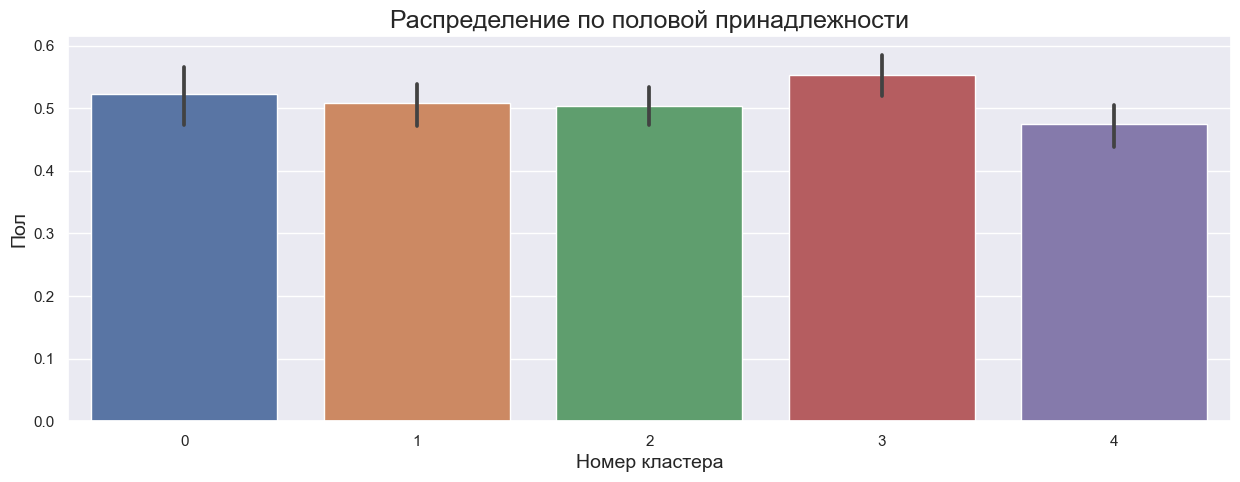

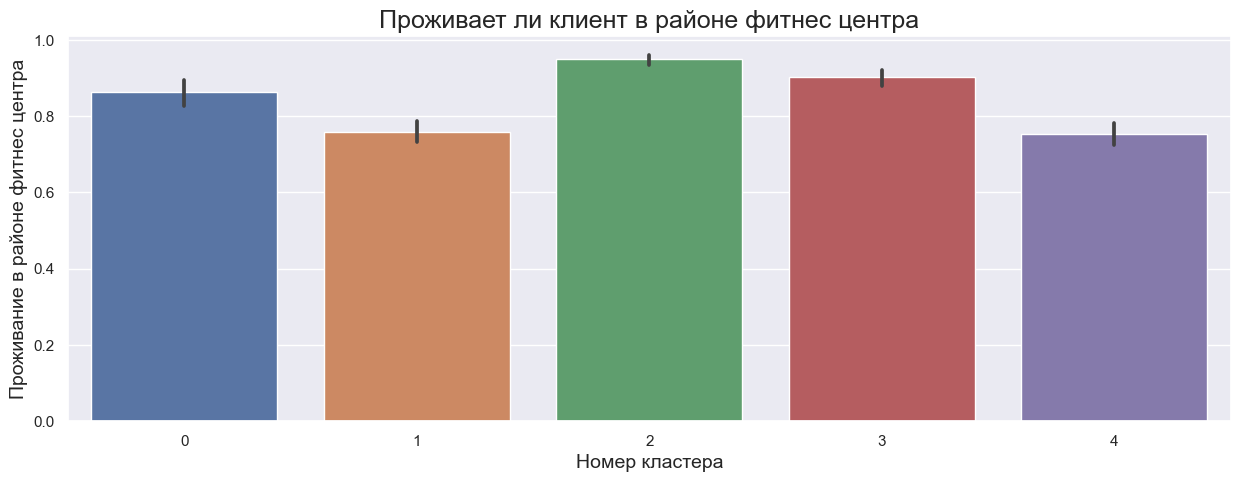

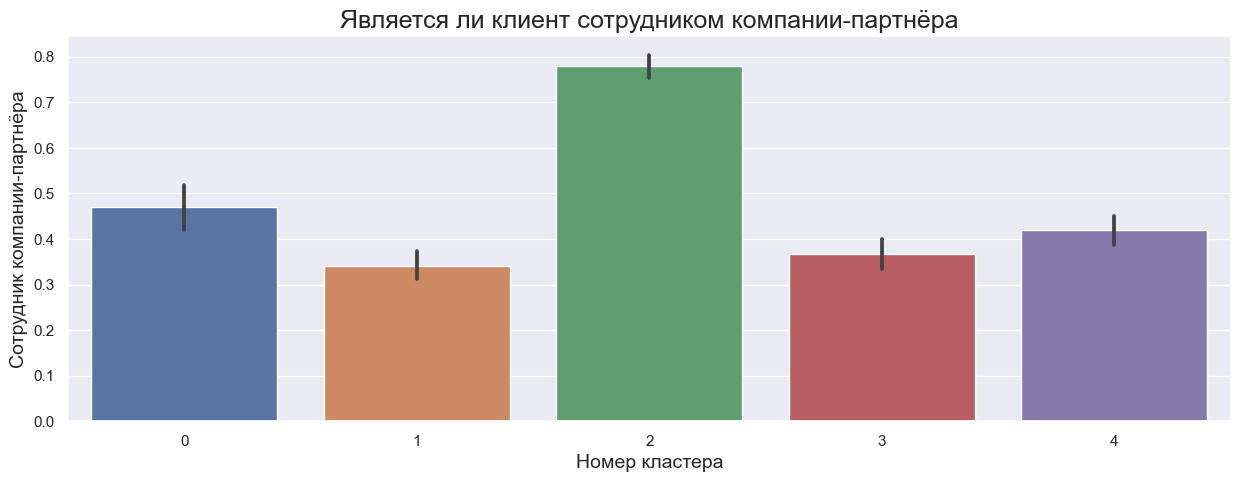

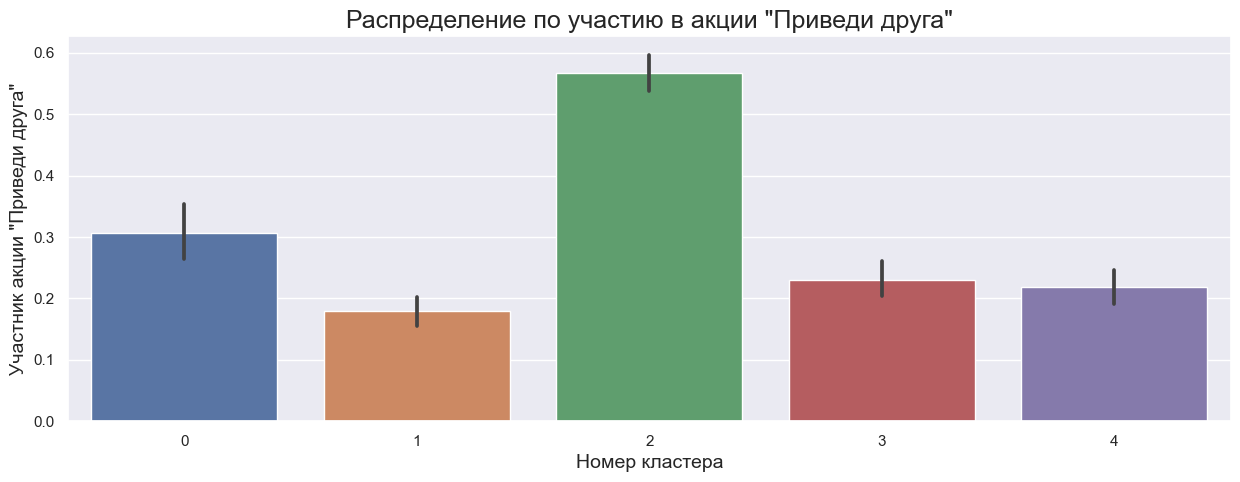

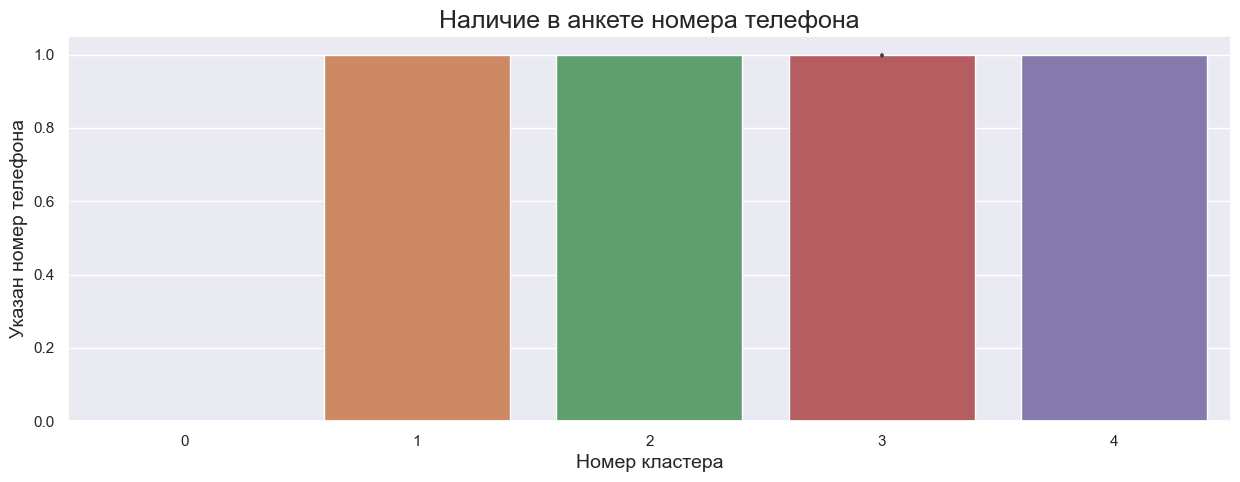

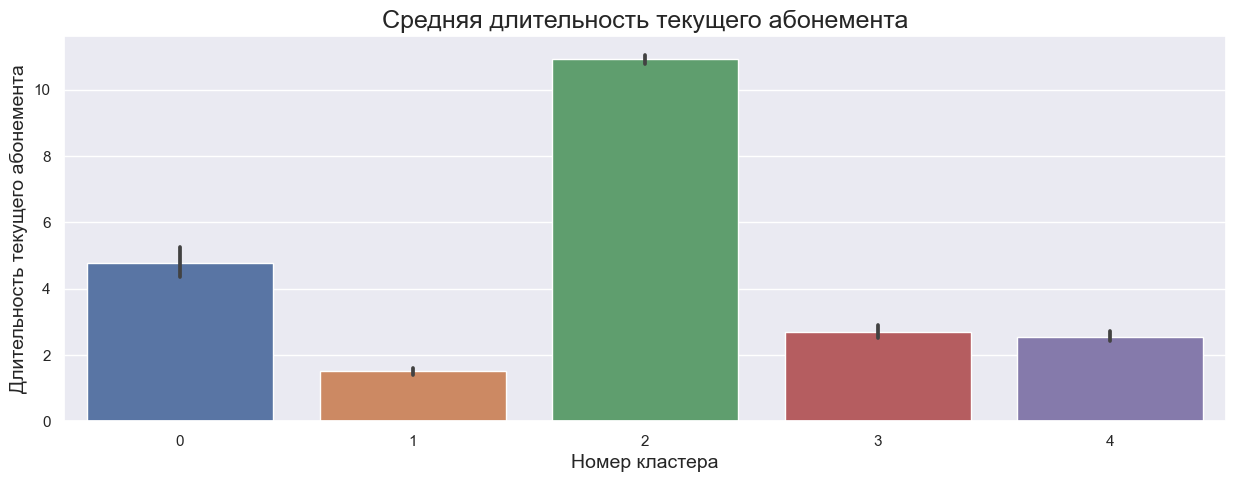

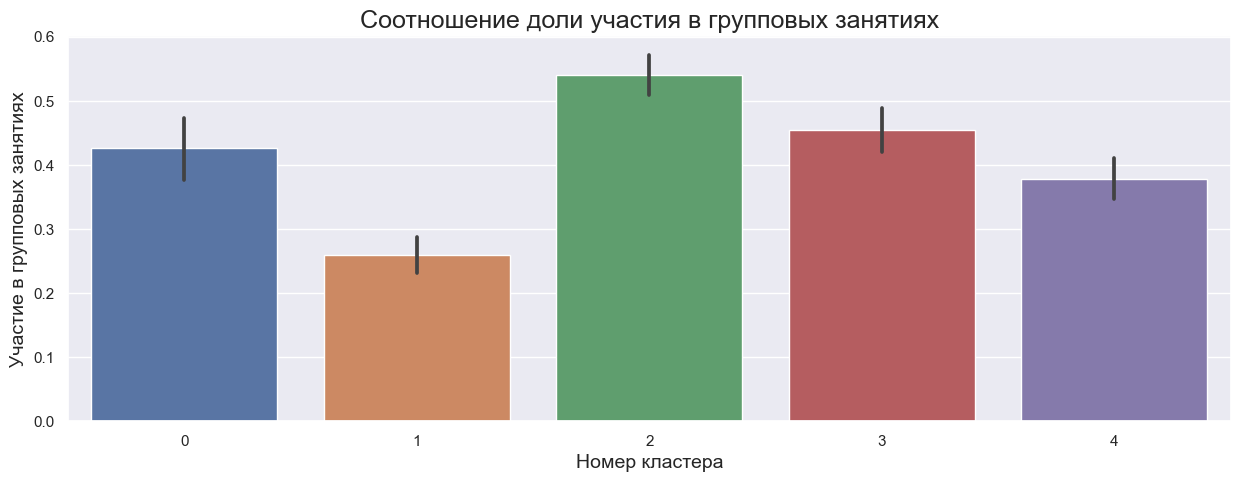

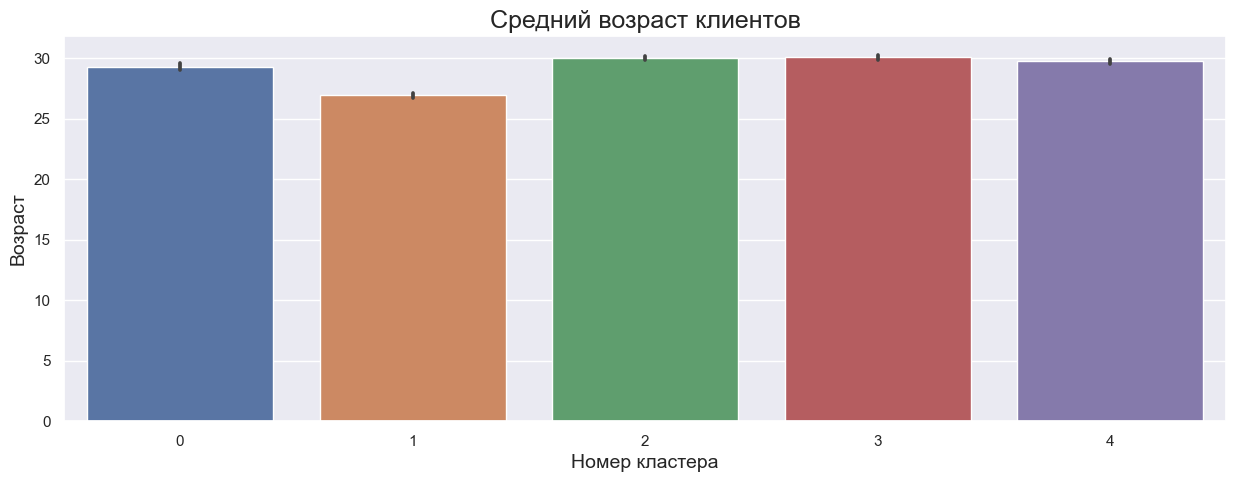

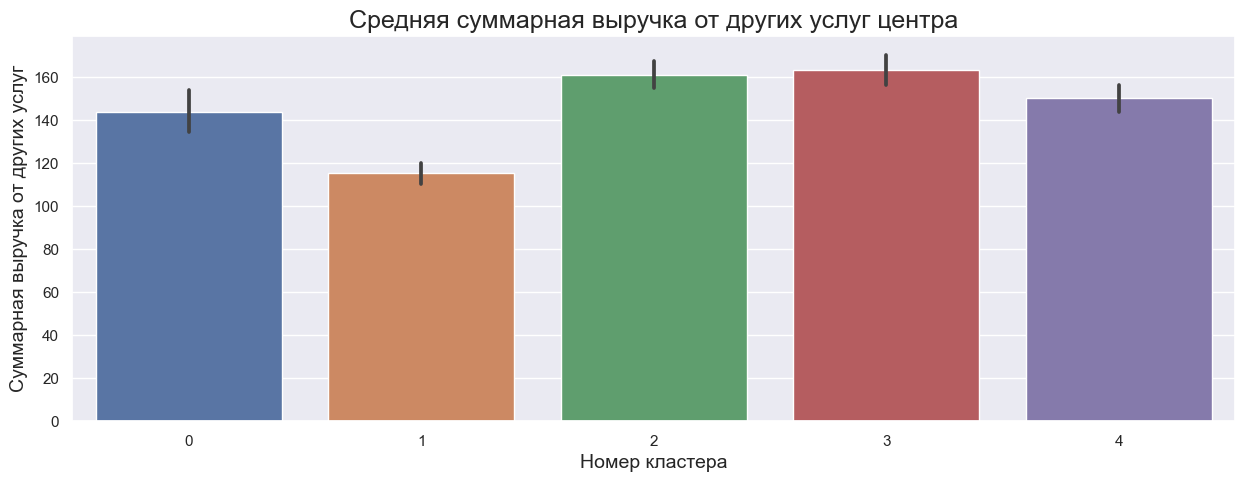

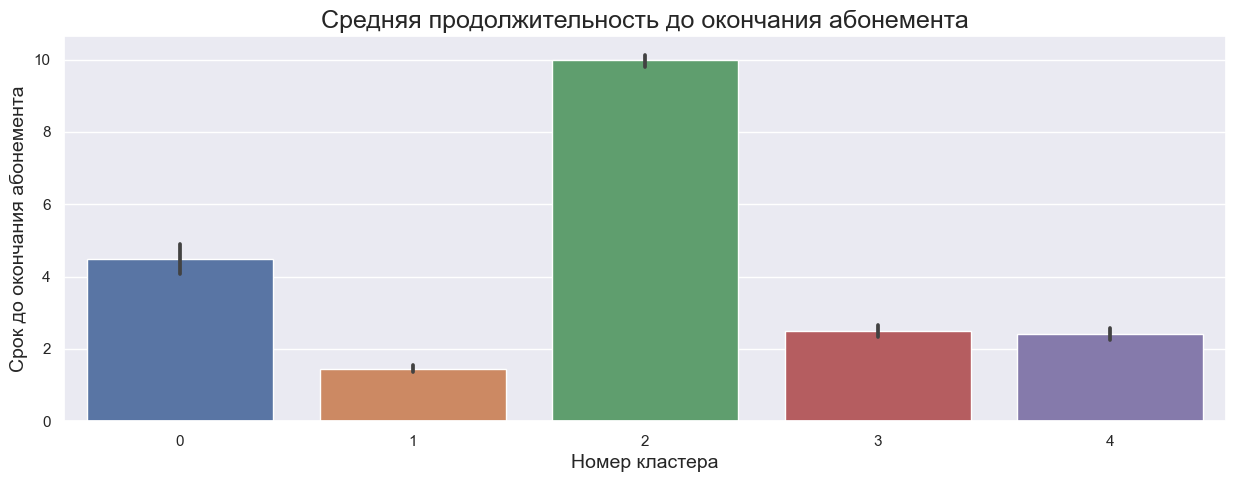

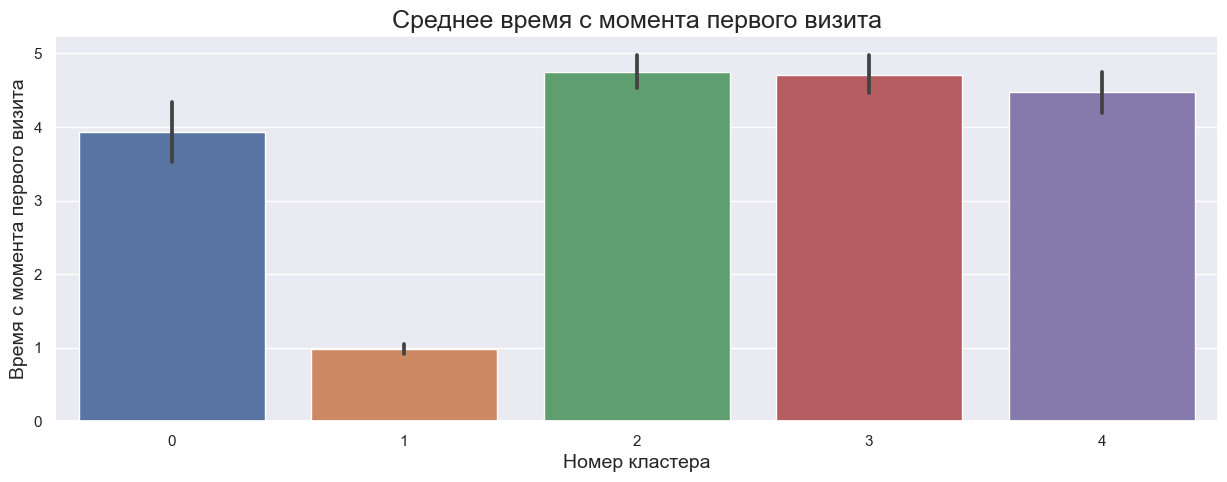

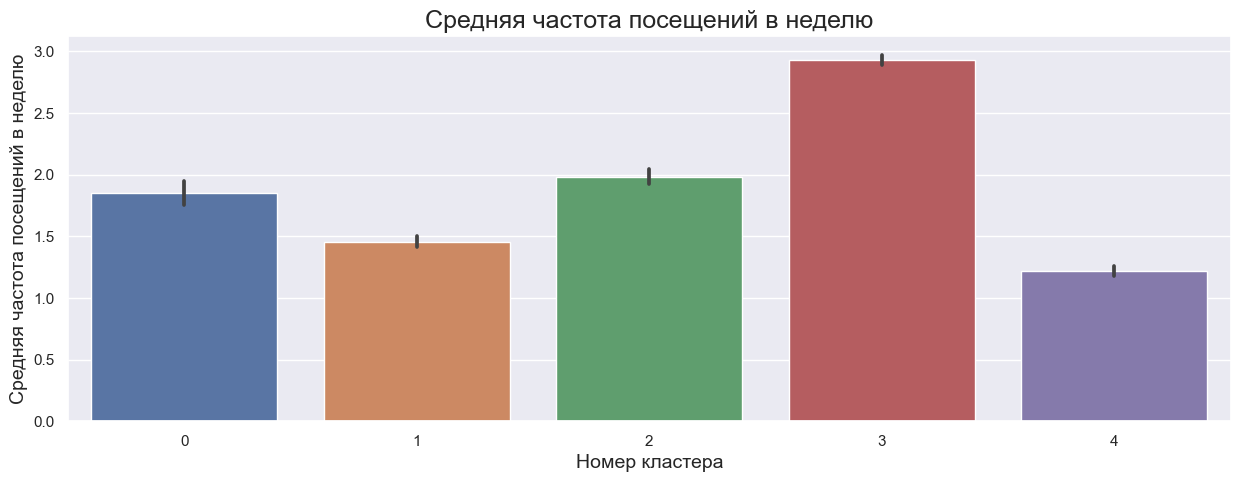

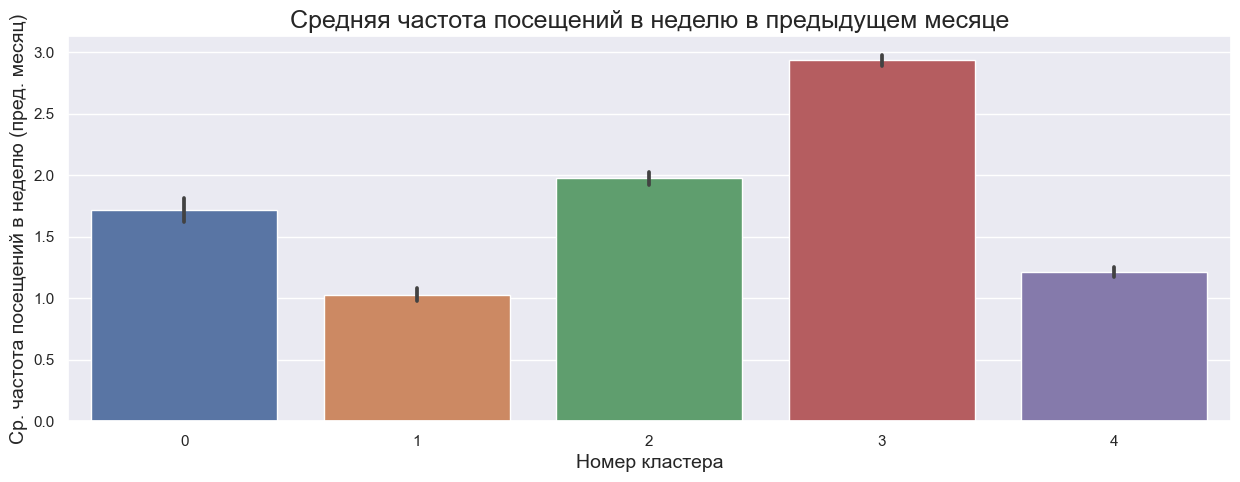

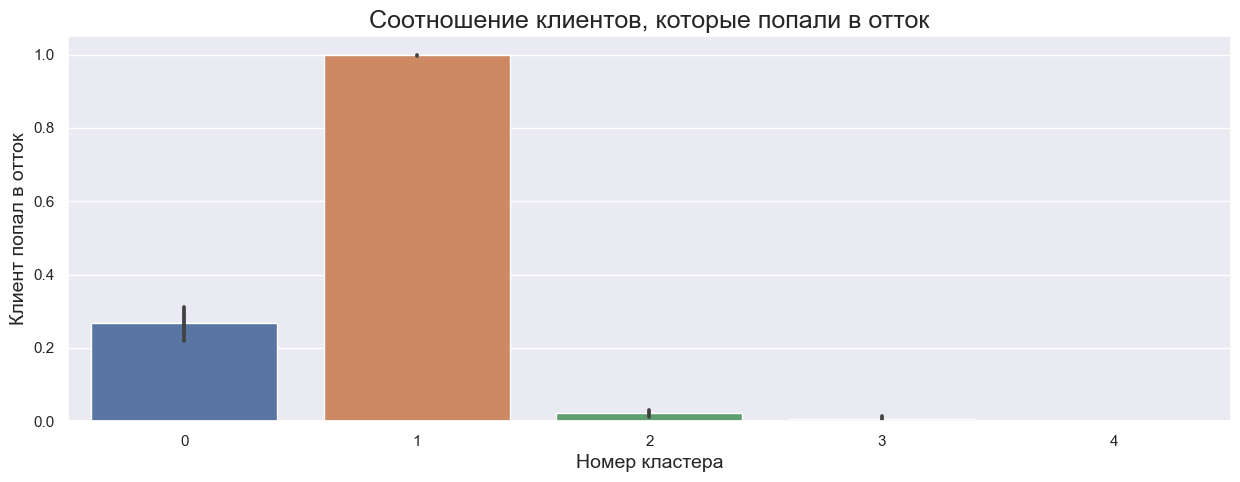

In [53]:
# Список с названиями признаков
column_list = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']
# Список с названиями графиков
title_list = ['Распределение по половой принадлежности', 'Проживает ли клиент в районе фитнес центра', 'Является ли клиент сотрудником компании-партнёра', 'Распределение по участию в акции "Приведи друга"', 'Наличие в анкете номера телефона', 'Средняя длительность текущего абонемента', 'Соотношение доли участия в групповых занятиях', 'Средний возраст клиентов', 'Средняя суммарная выручка от других услуг центра', 'Средняя продолжительность до окончания абонемента', 'Среднее время с момента первого визита', 'Средняя частота посещений в неделю', 'Средняя частота посещений в неделю в предыдущем месяце', 'Соотношение клиентов, которые попали в отток'] 
# Список с назнаниями подписей оси Х
ylabel_list = ['Пол', 'Проживание в районе фитнес центра', 'Сотрудник компании-партнёра', 'Участник акции "Приведи друга"', 'Указан номер телефона', 'Длительность текущего абонемента', 'Участие в групповых занятиях', 'Возраст', 'Суммарная выручка от других услуг', 'Срок до окончания абонемента', 'Время с момента первого визита', 'Средняя частота посещений в неделю', 'Ср. частота посещений в неделю (пред. месяц)', 'Клиент попал в отток']
# Цикл для создания графиков 'barplot'
count = 0 # Счётчик для отображения названия графика
for i in column_list:
    plt.figure(figsize = (15, 5))             # Размер графика
    plt.title(title_list[count], fontsize=18) # Название графика
    plt.xlabel('', fontsize=14) # Размер шрифта на оси X
    plt.ylabel('', fontsize=14) # Размер шрифта на оси Y
    sns.barplot(x='cluster_km', y=i, data=df).set(ylabel=ylabel_list[count], xlabel='Номер кластера') # График barplot
    plt.show()        # Отобразить график на экране
    count = count + 1 # Счётчик для отображения названия графика

In [54]:
# Расчёт соотношения клиентов попавших в отток и тех кто остался для каждого кластера
df.groupby(['churn', 'cluster_km']).agg({'churn':'count'})

churn
churn cluster_km       
0     0             282
      1               1
      2             993
      3             817
      4             846
1     0             103
      1             930
      2              22
      3               6

In [55]:
# Расчёт вероятности того, что клиент попадёт в отток для каждого кластера
churn_df = df.groupby('cluster_km').mean().reset_index()[['cluster_km', 'churn']]
churn_df['percent_churn'] = round(churn_df['churn'] * 100, 2)
churn_df[['cluster_km', 'percent_churn']]

,cluster_km,percent_churn
0,0,26.75
1,1,99.89
2,2,2.17
3,3,0.73
4,4,0.00
